In [1]:
import tensorflow as tf, pandas as pd, numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# make sure I can access datatools
import os
import sys
root_dir = '/Users/cerber/Projects/Lambo/ml/'
if root_dir not in sys.path:
    sys.path.append(root_dir)

In [3]:
df = pd.read_pickle('./data/raw_prices.pickle')
df = df.sort_values('Timestamp')


In [4]:
btc_df = df[df['CMC_ID'] == 'bitcoin']
print(btc_df.shape)
print(list(btc_df))


(12794, 3)
['CMC_ID', 'CC_USD_PRICE', 'Timestamp']


In [5]:
from MLDataTools import MLDataSet
from MLDataTools.preprocessing import relative_change_rates, chunks

FEATURES = ['CC_USD_PRICE']
TARGETS = ['CC_USD_PRICE']
normalized = np.array(relative_change_rates(btc_df[FEATURES].values))
normalized_df = pd.DataFrame(normalized, columns=FEATURES, dtype=np.float64)
ds = MLDataSet(normalized_df)

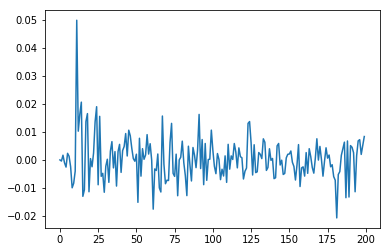

In [6]:
vals = normalized_df.values
plt.plot(vals[:200])
plt.show()

In [7]:
from models.LSTM.LSTM import LSTM
sess = tf.Session()

model = LSTM(
    sess=sess,
    num_layers=1,
    lstm_size=160,
    feature_len=len(FEATURES), 
    targets_shape=len(TARGETS),
    num_steps=7,
    epochs=15,
    plot_dir='./models/LSTM/plot_dir'
)


In [8]:
model.build_graph()

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:97: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [9]:
model.train(
          ds,
          init_learning_rate=0.001,
          init_epoch=5,
          learning_rate_decay=0.99,
          batch_size=100,
          keep_probability=0.7,
          train_test_ratio=0.9
)

Epoch:0 ---- [Learning rate: 0.001000] [test_loss:0.000006] 
Epoch:1 ---- [Learning rate: 0.001000] [test_loss:0.000006] 
Epoch:2 ---- [Learning rate: 0.001000] [test_loss:0.000006] 
Epoch:3 ---- [Learning rate: 0.001000] [test_loss:0.000006] 
Epoch:4 ---- [Learning rate: 0.001000] [test_loss:0.000016] 
Epoch:5 ---- [Learning rate: 0.000990] [test_loss:0.000006] 
Epoch:6 ---- [Learning rate: 0.000980] [test_loss:0.000006] 
Epoch:7 ---- [Learning rate: 0.000970] [test_loss:0.000010] 
Epoch:8 ---- [Learning rate: 0.000961] [test_loss:0.000007] 
Epoch:9 ---- [Learning rate: 0.000951] [test_loss:0.000006] 
Epoch:10 ---- [Learning rate: 0.000941] [test_loss:0.000007] 
Epoch:11 ---- [Learning rate: 0.000932] [test_loss:0.000007] 
Epoch:12 ---- [Learning rate: 0.000923] [test_loss:0.000006] 
Epoch:13 ---- [Learning rate: 0.000914] [test_loss:0.000006] 
Epoch:14 ---- [Learning rate: 0.000904] [test_loss:0.000007] 
